In [19]:
from import_data import VectorFetcher
from tf import TensorflowNN

vf = VectorFetcher(["train"])

['train']


In [20]:
trainingData = {}
trainingData["X"] = vf.get_vectors(["shakespeare","marlowe"], "train")
trainingData["Y"] = [1,1,1,1,0,0,0]

In [21]:
import pandas as pd

pd.DataFrame.from_dict(trainingData)

,X,Y
0,"(0, 269)\t1\n (0, 271)\t1\n (0, 274)\t1\n ...",1
1,"(0, 269)\t1\n (0, 271)\t1\n (0, 274)\t1\n ...",1
2,"(0, 269)\t1\n (0, 271)\t1\n (0, 274)\t1\n ...",1
3,"(0, 269)\t1\n (0, 271)\t1\n (0, 274)\t1\n ...",1
4,"(0, 269)\t1\n (0, 271)\t1\n (0, 274)\t1\n ...",0
5,"(0, 269)\t1\n (0, 271)\t1\n (0, 274)\t1\n ...",0
6,"(0, 269)\t1\n (0, 271)\t1\n (0, 274)\t1\n ...",0


In [22]:
testingData = {}
testingData["X"] = vf.get_vectors(["shakespeare","marlowe"], "test")
testingData["Y"] = [1,1,1,1,0,0,0]

pd.DataFrame.from_dict(testingData)

,X,Y
0,"(0, 273)\t2\n (0, 286)\t19\n (0, 287)\t4\n...",1
1,"(0, 273)\t2\n (0, 286)\t19\n (0, 287)\t4\n...",1
2,"(0, 273)\t2\n (0, 286)\t19\n (0, 287)\t4\n...",1
3,"(0, 273)\t2\n (0, 286)\t19\n (0, 287)\t4\n...",1
4,"(0, 273)\t2\n (0, 286)\t19\n (0, 287)\t4\n...",0
5,"(0, 273)\t2\n (0, 286)\t19\n (0, 287)\t4\n...",0
6,"(0, 273)\t2\n (0, 286)\t19\n (0, 287)\t4\n...",0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    MultinomialNB(),
    SVC(gamma="auto"),
    LinearSVC(),
    TensorflowNN(trainingData["X"].shape[1])
]

import time

for i in range(0, len(models)):
    models[i].fit(trainingData["X"], trainingData["Y"])
    time.sleep(1)

/home/workexp/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/workexp/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/workexp/.local/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:

accuracy = [model.score(testingData["X"], testingData["Y"]) * 100 for model in models]
model_labels = [model.__class__.__name__ for model in models]


7/7 [==============================] - 0s 10ms/sample - loss: 9.1601 - acc: 0.4286


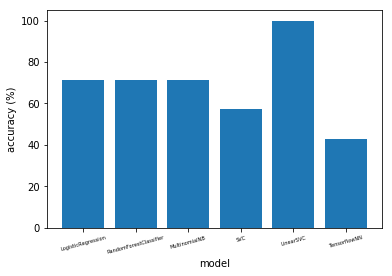

In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ind = index = np.arange(len(model_labels))
plt.bar(ind, accuracy)
plt.xlabel("model", fontsize=10)
plt.ylabel("accuracy (%)", fontsize=10)
plt.xticks(ind, model_labels, rotation=15, fontsize=5)

plt.savefig("models.png", dpi=500)
plt.show()



In [26]:

def predict(model):
    predictions = model.predict(testingData["X"])

    for i in range(0, len(predictions)):
        authors = ["marlowe", "shakespeare"]
        prediction = authors[predictions[i]]
        actual_author = authors[testingData["Y"][i]]
        print("Actual author:", actual_author, "- Predicted author:", prediction)

In [27]:
predict(models[4])

Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: marlowe - Predicted author: marlowe
Actual author: marlowe - Predicted author: marlowe
Actual author: marlowe - Predicted author: marlowe


LinearSVC model cannot predict probabilities

In [28]:
def savemodels():

    from joblib import dump
    import datetime

    for model in models:
        try:
            dump(model, model.__class__.__name__ + ".model")
        except:
            continue

In [29]:
savemodels()

In [30]:
for model in models:
    try:
        print(model.__class__.__name__,"\n", model.predict_proba(testingData["X"]))
    except:
        print(model.__class__.__name__,"\n" ,model.predict(testingData["X"]))

LogisticRegression 
 [[2.44249065e-15 1.00000000e+00]
 [2.56562982e-08 9.99999974e-01]
 [9.52349311e-13 1.00000000e+00]
 [2.72342869e-06 9.99997277e-01]
 [9.82001655e-02 9.01799835e-01]
 [9.99676608e-01 3.23391885e-04]
 [6.04917071e-04 9.99395083e-01]]
RandomForestClassifier 
 [[0.5 0.5]
 [0.6 0.4]
 [0.3 0.7]
 [0.4 0.6]
 [0.7 0.3]
 [0.7 0.3]
 [0.6 0.4]]
MultinomialNB 
 [[4.43268471e-284 1.00000000e+000]
 [1.00000000e+000 9.02230349e-301]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]]
SVC 
 [1 1 1 1 1 1 1]
LinearSVC 
 [1 1 1 1 0 0 0]
TensorflowNN 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [31]:
for model in models:
    print(model.__class__.__name__)
    print(predict(model))

LogisticRegression
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: marlowe - Predicted author: shakespeare
Actual author: marlowe - Predicted author: marlowe
Actual author: marlowe - Predicted author: shakespeare
None
RandomForestClassifier
Actual author: shakespeare - Predicted author: marlowe
Actual author: shakespeare - Predicted author: marlowe
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: marlowe - Predicted author: marlowe
Actual author: marlowe - Predicted author: marlowe
Actual author: marlowe - Predicted author: marlowe
None
MultinomialNB
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: marlowe
Actual author: shakespeare - Predicted aut

TypeError: only integer scalar arrays can be converted to a scalar index